In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('titanic_train.csv')
df.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [3]:
df.shape

(891, 12)

Our target is Suvived column, and we need to find the survival accuracy.

In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Here we can see that Name,Sex,Cabin and embarked are in object form. So we need to convert them into integer.

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

Here we can see in Age and Cabin there are lot of missing values. In Cabin theree are around 677 missing values, so we have dropped it.

In [ ]:
df.drop(['Cabin'],axis=1,inplace=True)

In [13]:
df.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S


There is no impact of passenger id on our taget, so we will drop it.

In [14]:
df.drop(['PassengerId'],axis=1,inplace=True)

In [15]:
df.head(8)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S


Now we will use imputer technique to fill the missing data in Age and Embarked column.

In [19]:
from sklearn.impute import SimpleImputer

imp= SimpleImputer(strategy='mean')
df['Age']=imp.fit_transform(df['Age'].values.reshape(-1, 1))
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [21]:
from sklearn.impute import SimpleImputer

imp= SimpleImputer(strategy='most_frequent')
df['Embarked']=imp.fit_transform(df['Embarked'].values.reshape(-1, 1))
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [22]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

<AxesSubplot:>

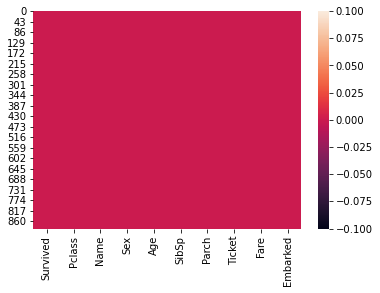

In [28]:
sns.heatmap(df.isnull())

We have used label encoder to convert the string values into binary

In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

list1=['Sex','Embarked']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,2
887,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,2
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,24.0,1,2,W./C. 6607,23.4500,2
889,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,0


We need to drop Name and ticket column as it is not useful for our taget.

In [26]:
df1=df.drop(['Name','Ticket'],axis=1)

In [27]:
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,24.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [29]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.657753
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked   -1.264823
dtype: float64

<AxesSubplot:xlabel='Pclass', ylabel='Density'>

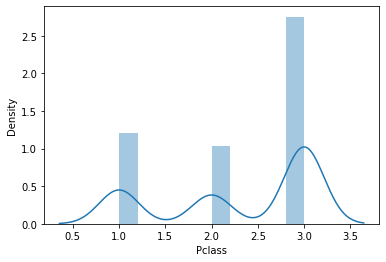

In [30]:
sns.distplot(df['Pclass'])

<AxesSubplot:xlabel='SibSp', ylabel='Density'>

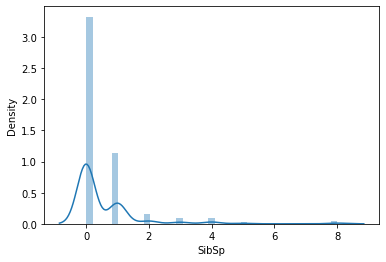

In [31]:
sns.distplot(df['SibSp'])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

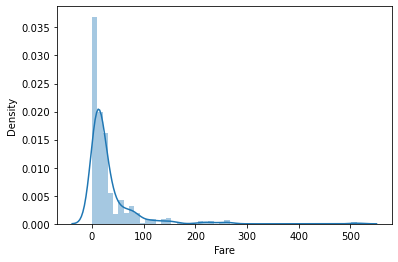

In [32]:
sns.distplot(df['Fare'])

In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [36]:
df1.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,28.566970,0.523008,0.381594,32.204208,1.536476
std,0.486592,0.836071,0.477990,13.199572,1.102743,0.806057,49.693429,0.791503
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,24.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


Survived       AxesSubplot(0.125,0.657941;0.227941x0.222059)
Pclass      AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Sex         AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Age            AxesSubplot(0.125,0.391471;0.227941x0.222059)
SibSp       AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Parch       AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Fare              AxesSubplot(0.125,0.125;0.227941x0.222059)
Embarked       AxesSubplot(0.398529,0.125;0.227941x0.222059)
dtype: object

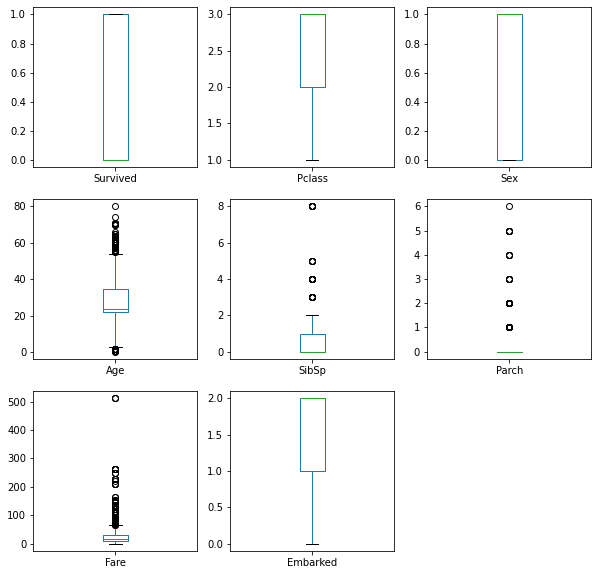

In [37]:
df1.plot(kind='box',subplots=True,layout=(3,3),figsize=(10,10))

In [38]:
df1.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.052872,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.338481,1.000000,0.131900,-0.356187,0.083081,0.018443,-0.549500,0.162098
Sex,-0.543351,0.131900,1.000000,0.073377,-0.114631,-0.245489,-0.182333,0.108262
Age,-0.052872,-0.356187,0.073377,1.000000,-0.232411,-0.155118,0.107554,-0.000020
SibSp,-0.035322,0.083081,-0.114631,-0.232411,1.000000,0.414838,0.159651,0.068230
Parch,0.081629,0.018443,-0.245489,-0.155118,0.414838,1.000000,0.216225,0.039798
Fare,0.257307,-0.549500,-0.182333,0.107554,0.159651,0.216225,1.000000,-0.224719
Embarked,-0.167675,0.162098,0.108262,-0.000020,0.068230,0.039798,-0.224719,1.000000


<AxesSubplot:>

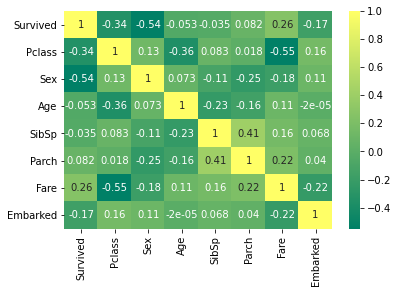

In [39]:
sns.heatmap(df1.corr(),cmap='summer',annot=True)

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [41]:
x=df1.iloc[:,1:]
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
888,3,0,24.0,1,2,23.4500,2
889,1,1,26.0,0,0,30.0000,0


In [42]:
x.shape

(891, 7)

In [43]:
x.shape[1]

7

In [49]:
y=df1.iloc[:,:-7]
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [50]:
def vif_calc():
    vif=pd.DataFrame()
    vif['features']=x.columns
    vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    print(vif)

In [51]:
vif_calc()

   features  VIF Factor
0    Pclass    5.574990
1       Sex    3.075405
2       Age    4.440482
3     SibSp    1.576662
4     Parch    1.612847
5      Fare    1.662921
6  Embarked    4.715989


From VIF factor we can see that there is any no multicollinearity, so we will not drop any column

# Removing Outliers uning Zscore

In [53]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df1))
z

array([[0.78927234, 0.82737724, 0.73769513, ..., 0.47367361, 0.50244517,
        0.58595414],
       [1.2669898 , 1.56610693, 1.35557354, ..., 0.47367361, 0.78684529,
        1.9423032 ],
       [1.2669898 , 0.82737724, 1.35557354, ..., 0.47367361, 0.48885426,
        0.58595414],
       ...,
       [0.78927234, 0.82737724, 1.35557354, ..., 2.00893337, 0.17626324,
        0.58595414],
       [1.2669898 , 1.56610693, 0.73769513, ..., 0.47367361, 0.04438104,
        1.9423032 ],
       [0.78927234, 0.82737724, 0.73769513, ..., 0.47367361, 0.49237783,
        0.67817453]])

In [54]:
threshold=3
print(np.where(z>3))

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
       119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
       299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
       527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
       689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
       824, 846, 850, 851, 858, 863, 885]), array([5, 4, 5, 6, 4, 4, 4, 4, 5, 6, 3, 3, 6, 4, 4, 4, 5, 4, 4, 4, 4, 4,
       6, 4, 4, 4, 6, 6, 4, 6, 5, 6, 6, 4, 5, 5, 6, 4, 3, 6, 4, 4, 6, 5,
       5, 3, 5, 3, 5, 6, 4, 4, 6, 6, 6, 6, 5, 6, 6, 3, 5, 6, 4, 4, 4, 4,
       4, 4, 3, 5, 4, 5]))


In [55]:
df_new=df1[(z<3).all(axis=1)]

In [56]:
df_new.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [57]:
df1.shape

(891, 8)

In [58]:
df_new.shape

(820, 8)

In [59]:
loss_percentage=(891-820)/891*100
print(loss_percentage)

7.968574635241302


As we have checked that after removing outliers using z score our data loss percentage is around 8 % which is ok.

In [64]:
df1=df_new

In [65]:
x=df1.iloc[:,1:]
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [67]:
y=df1.iloc[:,-8]
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# Removing Skewness

In [74]:
df1.skew()

Survived    0.450825
Pclass     -0.632242
Sex        -0.664152
Age         0.564753
SibSp       1.979577
Parch       2.122629
Fare        2.318761
Embarked   -1.277386
dtype: float64

In [69]:
from sklearn.preprocessing import power_transform

In [75]:
x=power_transform(x,method='yeo-johnson')
x

array([[ 0.88846709,  0.72203588, -0.48357085, ..., -0.48470584,
        -0.83788239,  0.61274254],
       [-1.39932943, -1.38497273,  0.77935661, ..., -0.48470584,
         1.56529351, -1.67207555],
       [ 0.88846709, -1.38497273, -0.14955098, ..., -0.48470584,
        -0.74752896,  0.61274254],
       ...,
       [ 0.88846709, -1.38497273, -0.31471136, ...,  2.06363975,
         0.3888663 ,  0.61274254],
       [-1.39932943,  0.72203588, -0.14955098, ..., -0.48470584,
         0.65059543, -1.67207555],
       [ 0.88846709,  0.72203588,  0.32682419, ..., -0.48470584,
        -0.77025797, -1.5403802 ]])

In [76]:
df1.skew()

Survived    0.450825
Pclass     -0.632242
Sex        -0.664152
Age         0.564753
SibSp       1.979577
Parch       2.122629
Fare        2.318761
Embarked   -1.277386
dtype: float64

<AxesSubplot:xlabel='Pclass', ylabel='Density'>

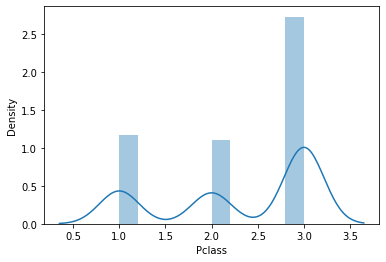

In [77]:
sns.distplot(df1['Pclass'])

<AxesSubplot:xlabel='Sex', ylabel='Density'>

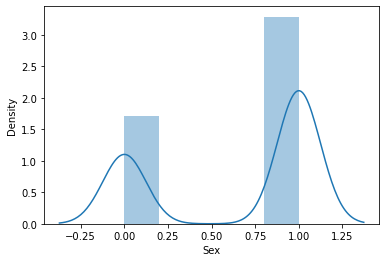

In [79]:
sns.distplot(df1['Sex'])

<AxesSubplot:xlabel='SibSp', ylabel='Density'>

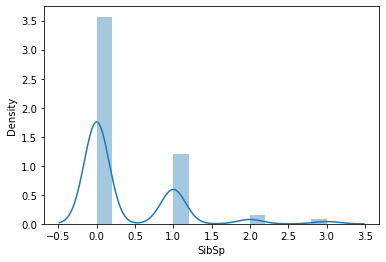

In [80]:
sns.distplot(df1['SibSp'])

<AxesSubplot:xlabel='Embarked', ylabel='Density'>

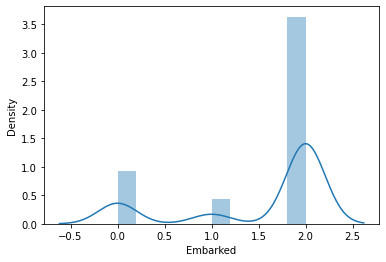

In [81]:
sns.distplot(df1['Embarked'])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

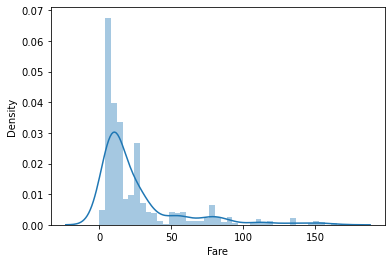

In [82]:
sns.distplot(df1['Fare'])

# Scaling of the data

Now we will use scaling technique (StandardScaler and MinMaxScaler) to transform the features to the same scale.

In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [72]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.87283049,  0.72203588, -0.48915262, ..., -0.48469263,
        -0.83470177,  0.60778719],
       [-1.47067587, -1.38497273,  0.77694225, ..., -0.48469263,
         1.55364494, -1.78767552],
       [ 0.87283049, -1.38497273, -0.15643285, ..., -0.48469263,
        -0.74331399,  0.60778719],
       ...,
       [ 0.87283049, -1.38497273, -0.3211492 , ...,  2.08665417,
         0.39490799,  0.60778719],
       [-1.47067587,  0.72203588, -0.15643285, ..., -0.48469263,
         0.65432009, -1.78767552],
       [ 0.87283049,  0.72203588,  0.32078503, ..., -0.48469263,
        -0.76629016, -1.24967343]])

In [73]:
mms=MinMaxScaler()
x=mms.fit_transform(x)
x

array([[1.        , 1.        , 0.41480056, ..., 0.        , 0.44566706,
        1.        ],
       [0.        , 0.        , 0.64579502, ..., 0.        , 0.85522966,
        0.        ],
       [1.        , 0.        , 0.47550409, ..., 0.        , 0.46133858,
        1.        ],
       ...,
       [1.        , 0.        , 0.44545218, ..., 1.        , 0.65652513,
        1.        ],
       [0.        , 1.        , 0.47550409, ..., 0.        , 0.70101008,
        0.        ],
       [1.        , 1.        , 0.56257077, ..., 0.        , 0.45739854,
        0.22459213]])

# Regression Model Comparisons

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import Lasso,Ridge

In [85]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=90)

In [86]:
x_train.shape

(574, 7)

In [87]:
x_test.shape

(246, 7)

In [88]:
y_train.shape

(574,)

In [89]:
lg = LogisticRegression()
lg.fit(x_train,y_train)
lg.score(x_train,y_train)

0.7979094076655052

In [90]:
pred=lg.predict(x_test)
print('Predicted result value:',pred)
print('actual value',y_test)

Predicted result value: [1 1 1 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1
 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1
 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0
 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 1 0
 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0 0 0
 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0]
actual value 537    1
1      1
85     1
396    0
145    0
      ..
449    1
621    1
212    0
733    0
800    0
Name: Survived, Length: 246, dtype: int64


In [92]:
print('accuracy_score:',accuracy_score(y_test,pred))

accuracy_score: 0.8211382113821138


In [93]:
print(confusion_matrix(y_test,pred))

[[129  22]
 [ 22  73]]


In [94]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       151
           1       0.77      0.77      0.77        95

    accuracy                           0.82       246
   macro avg       0.81      0.81      0.81       246
weighted avg       0.82      0.82      0.82       246



In [96]:
from sklearn.naive_bayes import MultinomialNB #MultinomialNB as outout category is more than '2'
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [97]:
dtc=DecisionTreeClassifier()
for i in range (0,574):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.35,random_state=i)
    dtc.fit(x_train,y_train)
    dtc.score(x_train,y_train)
    pred_train_dtc=dtc.predict(x_train)
    pred_test_dtc=dtc.predict(x_test)
    if round(accuracy_score(y_train,pred_train_dtc)*100,1)==round(accuracy_score(y_test,pred_test_dtc)*100,1):
        print('At random state',i,'The model performs very well')
        print('At random state:-',i)
        print('Training accuracy score is:-',accuracy_score(y_train,pred_train_dtc)*100)
        print('Training accuracy score is:-',accuracy_score(y_test,pred_test_dtc)*100)

In [98]:
svc=SVC()
for i in range (0,574):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    svc.fit(x_train,y_train)
    svc.score(x_train,y_train)
    pred_train_svc=svc.predict(x_train)
    pred_test_svc=svc.predict(x_test)
    if round(accuracy_score(y_train,pred_train_svc)*100,1)==round(accuracy_score(y_test,pred_test_svc)*100,1):
        print('At random state',i,'The model performs very well')
        print('At random state:-',i)
        print('Training accuracy score is:-',accuracy_score(y_train,pred_train_svc)*100)
        print('Training accuracy score is:-',accuracy_score(y_test,pred_test_svc)*100)

At random state 116 The model performs very well
At random state:- 116
Training accuracy score is:- 83.27526132404182
Training accuracy score is:- 83.33333333333334
At random state 204 The model performs very well
At random state:- 204
Training accuracy score is:- 82.92682926829268
Training accuracy score is:- 82.92682926829268
At random state 221 The model performs very well
At random state:- 221
Training accuracy score is:- 83.27526132404182
Training accuracy score is:- 83.33333333333334
At random state 373 The model performs very well
At random state:- 373
Training accuracy score is:- 81.70731707317073
Training accuracy score is:- 81.70731707317073
At random state 409 The model performs very well
At random state:- 409
Training accuracy score is:- 83.27526132404182
Training accuracy score is:- 83.33333333333334
At random state 495 The model performs very well
At random state:- 495
Training accuracy score is:- 82.92682926829268
Training accuracy score is:- 82.92682926829268


In [99]:

svc=SVC()
knc=KNeighborsClassifier()
dtc=DecisionTreeClassifier()

model=[knc,svc,dtc]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

0.7154471544715447
[[110  44]
 [ 26  66]]
              precision    recall  f1-score   support

           0       0.81      0.71      0.76       154
           1       0.60      0.72      0.65        92

    accuracy                           0.72       246
   macro avg       0.70      0.72      0.71       246
weighted avg       0.73      0.72      0.72       246



0.7764227642276422
[[132  22]
 [ 33  59]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       154
           1       0.73      0.64      0.68        92

    accuracy                           0.78       246
   macro avg       0.76      0.75      0.75       246
weighted avg       0.77      0.78      0.77       246



0.7073170731707317
[[114  40]
 [ 32  60]]
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       154
           1       0.60      0.65      0.63        92

    accuracy                           0.71       24

# Cross Validation

In [100]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(svc,x,y,cv=5)
print(score)
print (score.mean())
print (score.std())

[0.81707317 0.79878049 0.80487805 0.79878049 0.86585366]
0.8170731707317074
0.025288343113814272


In [101]:
from sklearn.model_selection import KFold
#KFold(n_splits=5)

kfold=KFold(5)

score=cross_val_score(svc,x,y,cv=kfold)
print(score)
print (score.mean())
print (score.std())

[0.80487805 0.79268293 0.81097561 0.78658537 0.87804878]
0.8146341463414635
0.03285900874465238


In [102]:
score=cross_val_score(knc,x,y,cv=5)  #Directly we have given cv=5 and used Kneighbour model
print(score)
print (score.mean())
print (score.std())

[0.77439024 0.7804878  0.83536585 0.79878049 0.84146341]
0.8060975609756097
0.0276482537774503


In [103]:
score=cross_val_score(dtc,x,y,cv=5)  #Directly we have given cv=5 and used Decision Tree Classifier
print(score)
print (score.mean())
print (score.std())

[0.73780488 0.77439024 0.81097561 0.75609756 0.77439024]
0.7707317073170732
0.024267986270893188


In [104]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


In [107]:
parameters={'kernel':['linear','rbf'],'C':[1,10]}
svc=SVC()
clf=GridSearchCV(svc, parameters)
clf.fit(x_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ['linear', 'rbf']})

In [108]:
print(clf.best_params_)

{'C': 1, 'kernel': 'rbf'}


In [109]:
svc=SVC(kernel='rbf',C=1)
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7764227642276422
[[132  22]
 [ 33  59]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       154
           1       0.73      0.64      0.68        92

    accuracy                           0.78       246
   macro avg       0.76      0.75      0.75       246
weighted avg       0.77      0.78      0.77       246



In [110]:
import pickle
filename='titanic.pkl'
pickle.dump(svc,open(filename,'wb'))